<a href="https://colab.research.google.com/github/MiftahulLabiib/local_shoes_analysis/blob/main/Local_Shoes_Store_(DA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Profil Stakeholder
**Denova** merupakan salah satu brand toko sepatu lokal di kota New York, Amerika Serikat.

Toko sepatu ini ingin memasarkan produknya melalui e-commerce.

Sebagai seorang Data Analyst, bantulah **Denova** dalam menyusun strategi pemasaran yang tepat.

# Business Question
- Platform penjualan/promosi online apa yang cocok? (Tio)
- Jenis sepatu apa yang digemari masyarakat? (Labiib)
- Berapa kisaran harga yang "affordable" bagi penduduk? (Hanan)

# Load Dataset
## Social Influence on Shopping (First Dataset)
Dataset Description

This data was collected on our social survey mobile platform Whatsgoodly. We have 300,000 millennial and Gen Z members, and have collected 150,000,000 survey responses from this demographic to date.

https://data.world/ahalps/social-influence-on-shopping/workspace/file?filename=WhatsgoodlyData-6.csv

In [ ]:
# Load data
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
filename1 = 'gdrive/MyDrive/Dataset/Algoritma/WhatsgoodlyData-6.csv'
df_social = pd.read_csv(filename1)
df_social.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


Column field description:
* Question : Pertanyaan yang diajukan "Platform media sosial apa yang paling mempengaruhi kamu dalam berbelanja online?"
* Segment Type : Pembagian kelompok tertentu
* Segment Description : Penjelasan lebih lanjut dari "Segment Type"
* Answer : Jawaban berupa nama platform media sosial
* Count : Jumlah responden
* Percentage : Proporsi dari jumlah total responden

In [ ]:
df_social.shape

(1450, 6)

# Data Cleaning

In [ ]:
df_social.isna().sum()

Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

In [ ]:
df_social["Question"].value_counts()

What social platform has influenced your online shopping most?    1450
Name: Question, dtype: int64

In [ ]:
# Hapus kolom Question karena hanya berisi satu kalimat yang sama
df_social.drop("Question", axis=1, inplace=True)

In [ ]:
df_social.dtypes

Segment Type            object
Segment Description     object
Answer                  object
Count                    int64
Percentage             float64
dtype: object

In [ ]:
df_social['Segment Type'].value_counts()

University    870
Custom        560
Gender         10
Mobile          5
Web             5
Name: Segment Type, dtype: int64

In [ ]:
df_social['Answer'].value_counts()

Facebook     290
Instagram    290
Snapchat     290
Twitter      290
None         290
Name: Answer, dtype: int64

In [ ]:
df_social[['Segment Type','Answer']] = df_social[['Segment Type','Answer']].astype("category")

# Exploratory Data Analysis

## Question: What platform did the people mostly used?

In [ ]:
df_social.pivot_table(index='Answer', values='Count', aggfunc='sum')

,Count
Answer,
Facebook,10329
Instagram,16524
None,18936
Snapchat,1574
Twitter,3407


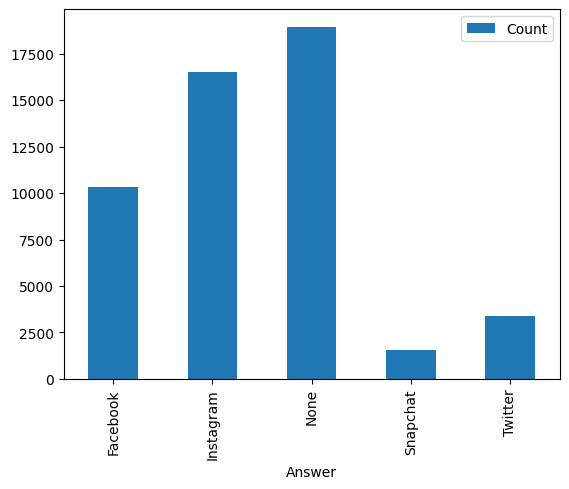

In [ ]:
df_social.pivot_table(index='Answer', values='Count', aggfunc='sum').plot.bar();

In [ ]:
# How many people choose "None"
summary = df_social.pivot_table(index='Answer', values='Count', aggfunc='sum')
summary.loc['None','Count'] / summary['Count'].sum()

0.3729761670277723

In [ ]:
# Remove category "None"
answer_without_None = df_social[df_social['Answer'] != 'None']
answer_without_None['Answer'] = answer_without_None['Answer'].cat.remove_unused_categories()

<ipython-input-13-fcf62fc0ab2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_without_None['Answer'] = answer_without_None['Answer'].cat.remove_unused_categories()


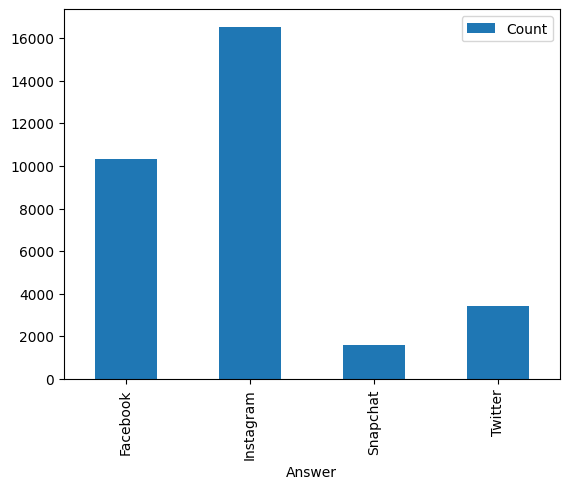

In [ ]:
answer_without_None.pivot_table(index='Answer', values='Count', aggfunc='sum').plot.bar();

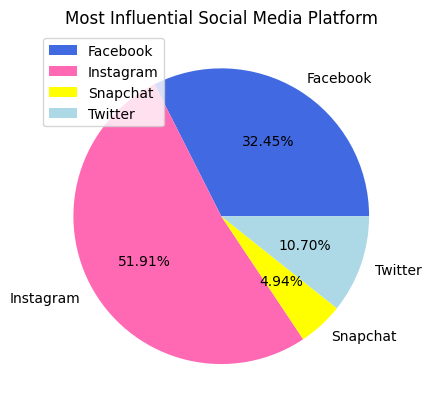

In [ ]:
answer_without_None.pivot_table(index='Answer', values='Count', aggfunc='sum').plot.pie(subplots=True,
                                                                                        autopct='%1.2f%%',
                                                                                        colors=['royalblue',
                                                                                                'hotpink',
                                                                                                'yellow',
                                                                                                'lightblue']);
plt.title("Most Influential Social Media Platform");
plt.ylabel(None);
plt.legend(loc='upper left');

## Investigate the Segment

In [ ]:
df_social['Segment Type'].value_counts()

University    870
Custom        560
Gender         10
Mobile          5
Web             5
Name: Segment Type, dtype: int64

### Gender Segment

In [ ]:
df_social[df_social['Segment Type'] == 'Gender']['Segment Description'].value_counts()

Female voters    5
Male voters      5
Name: Segment Description, dtype: int64

In [ ]:
gender = df_social[df_social['Segment Type'] == "Gender"].iloc[:,1:-1]
gender

,Segment Description,Answer,Count
10,Female voters,Facebook,222
11,Female voters,Instagram,535
12,Female voters,Snapchat,29
13,Female voters,Twitter,57
14,Female voters,None,271
15,Male voters,Facebook,326
16,Male voters,Instagram,380
17,Male voters,Snapchat,56
18,Male voters,Twitter,122
19,Male voters,None,678


In [ ]:
gender.replace('Female voters', 'Female', inplace=True)
gender.replace('Male voters', 'Male', inplace=True)
gender

,Segment Description,Answer,Count
10,Female,Facebook,222
11,Female,Instagram,535
12,Female,Snapchat,29
13,Female,Twitter,57
14,Female,None,271
15,Male,Facebook,326
16,Male,Instagram,380
17,Male,Snapchat,56
18,Male,Twitter,122
19,Male,None,678


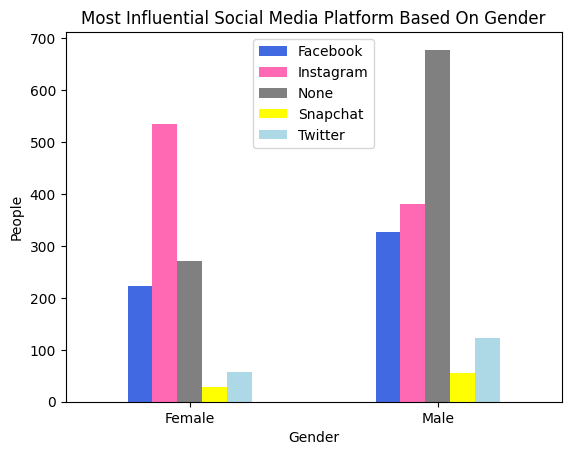

In [ ]:
gender.set_index(['Segment Description', 'Answer']).unstack(level='Answer').droplevel(None, axis=1).plot.bar(color=['royalblue',
                                                                                                                      'hotpink',
                                                                                                                      'grey',
                                                                                                                      'yellow',
                                                                                                                      'lightblue']);
plt.title("Most Influential Social Media Platform Based On Gender");
plt.ylabel("People");
plt.xlabel("Gender");
plt.xticks(rotation='horizontal');
plt.legend(loc='upper center');

### Custom Segment

In [ ]:
np.sort(df_social[df_social['Segment Type'] == 'Custom']['Segment Description'].unique())

array(['Are you a? SVB team member', 'Are you a? Student Trekker',
       'Are you single? No', 'Are you single? Yes', 'Are you? Christian',
       'Are you? Jewish', 'Are you? Muslim', 'Are you? None/Other',
       'Graduation Year 2017', 'Graduation Year 2018',
       'Graduation Year 2019', 'Graduation Year 2020', "I'm in? College",
       "I'm in? Grad School", "I'm in? High School", "I'm in? Other",
       "I'm in? Post-grad", 'Mac or PC? Mac 🖥', 'Mac or PC? Other 🐧',
       'Mac or PC? PC 💻', 'Sexual orientation? Bi',
       'Sexual orientation? Confused', 'Sexual orientation? Gay',
       'Sexual orientation? Straight', "What's your GPA? 1.0 to 2.0",
       "What's your GPA? 2.0 to 3.0", "What's your GPA? 3.0 to 4.0",
       "What's your GPA? Above 4.0 😏", "What's your GPA? Below 1.0 😁",
       "What's your leaning? Conservative 🐘",
       "What's your leaning? In-between",
       "What's your leaning? Liberal 🔷",
       "What's your major? Business/Econ/Finance",
       "What's

In [ ]:
# Parent income
parent_income = df_social[df_social['Segment Description'].isin(['your parents make? Middle / lower-middle class (~$90K)',
                                                                 'your parents make? Poor (< ~$50K) 😁',
                                                                 'your parents make? Upper class (> $240K)',
                                                                 'your parents make? Upper-middle class (~$160K'])].iloc[:,1:-1]
parent_income

,Segment Description,Answer,Count
915,your parents make? Upper class (> $240K),Facebook,70
916,your parents make? Upper class (> $240K),Instagram,83
917,your parents make? Upper class (> $240K),Snapchat,8
918,your parents make? Upper class (> $240K),Twitter,13
919,your parents make? Upper class (> $240K),None,130
920,your parents make? Upper-middle class (~$160K,Facebook,71
921,your parents make? Upper-middle class (~$160K,Instagram,149
922,your parents make? Upper-middle class (~$160K,Snapchat,11
923,your parents make? Upper-middle class (~$160K,Twitter,42
924,your parents make? Upper-middle class (~$160K,None,178


In [ ]:
parent_income.replace('your parents make? Poor (< ~$50K) 😁', 'Poor', inplace=True)
parent_income.replace('your parents make? Middle / lower-middle class (~$90K)', 'Lower-middle', inplace=True)
parent_income.replace('your parents make? Upper-middle class (~$160K', 'Upper-middle', inplace=True)
parent_income.replace('your parents make? Upper class (> $240K)', 'Rich', inplace=True)

In [ ]:
parent_income

,Segment Description,Answer,Count
915,Rich,Facebook,70
916,Rich,Instagram,83
917,Rich,Snapchat,8
918,Rich,Twitter,13
919,Rich,None,130
920,Upper-middle,Facebook,71
921,Upper-middle,Instagram,149
922,Upper-middle,Snapchat,11
923,Upper-middle,Twitter,42
924,Upper-middle,None,178


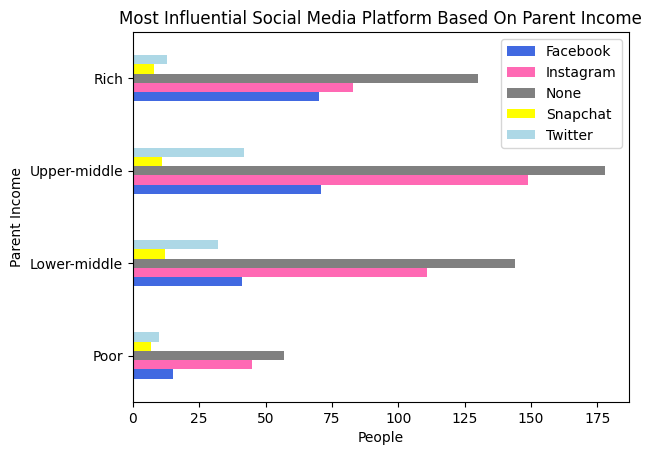

In [ ]:
parent_income.set_index(['Segment Description', 'Answer']).unstack(level='Answer').droplevel(None, axis=1).reindex(['Poor',
                                                                                                                    'Lower-middle',
                                                                                                                    'Upper-middle',
                                                                                                                    'Rich']).plot.barh(color=['royalblue',
                                                                                                                                              'hotpink',
                                                                                                                                              'grey',
                                                                                                                                              'yellow',
                                                                                                                                              'lightblue']);
plt.title("Most Influential Social Media Platform Based On Parent Income");
plt.ylabel("Parent Income");
plt.xlabel("People");
plt.legend(loc='upper right');

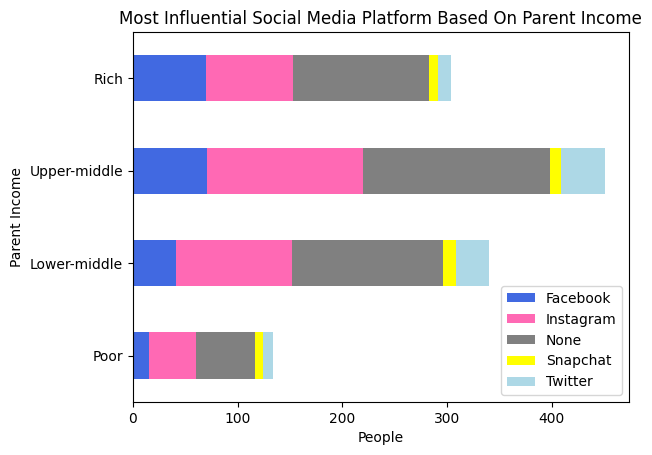

In [ ]:
parent_income.set_index(['Segment Description', 'Answer']).unstack(level='Answer').droplevel(None, axis=1).reindex(['Poor',
                                                                                                                    'Lower-middle',
                                                                                                                    'Upper-middle',
                                                                                                                    'Rich']).plot.barh(color=['royalblue',
                                                                                                                                              'hotpink',
                                                                                                                                              'grey',
                                                                                                                                              'yellow',
                                                                                                                                              'lightblue'],
                                                                                                                                       stacked=True);
plt.title("Most Influential Social Media Platform Based On Parent Income");
plt.ylabel("Parent Income");
plt.xlabel("People");
plt.legend(loc='lower right');

In [ ]:
# Institution
institution = df_social[df_social['Segment Description'].isin(["I'm in? College",
                                                                 "I'm in? Grad School",
                                                                 "I'm in? High School",
                                                                 "I'm in? Other",
                                                                 "I'm in? Post-grad"])].iloc[:,1:-1]
institution

,Segment Description,Answer,Count
1190,I'm in? Other,Facebook,3
1191,I'm in? Other,Instagram,6
1192,I'm in? Other,Snapchat,2
1193,I'm in? Other,Twitter,0
1194,I'm in? Other,None,8
1195,I'm in? Grad School,Facebook,7
1196,I'm in? Grad School,Instagram,13
1197,I'm in? Grad School,Snapchat,4
1198,I'm in? Grad School,Twitter,3
1199,I'm in? Grad School,None,14


In [ ]:
institution.replace("I'm in? Other", "Other", inplace=True)
institution.replace("I'm in? Grad School", "Grad School", inplace=True)
institution.replace("I'm in? Post-grad", "Post-grad", inplace=True)
institution.replace("I'm in? College", "College", inplace=True)
institution.replace("I'm in? High School", "High School", inplace=True)

In [ ]:
institution

,Segment Description,Answer,Count
1190,Other,Facebook,3
1191,Other,Instagram,6
1192,Other,Snapchat,2
1193,Other,Twitter,0
1194,Other,None,8
1195,Grad School,Facebook,7
1196,Grad School,Instagram,13
1197,Grad School,Snapchat,4
1198,Grad School,Twitter,3
1199,Grad School,None,14


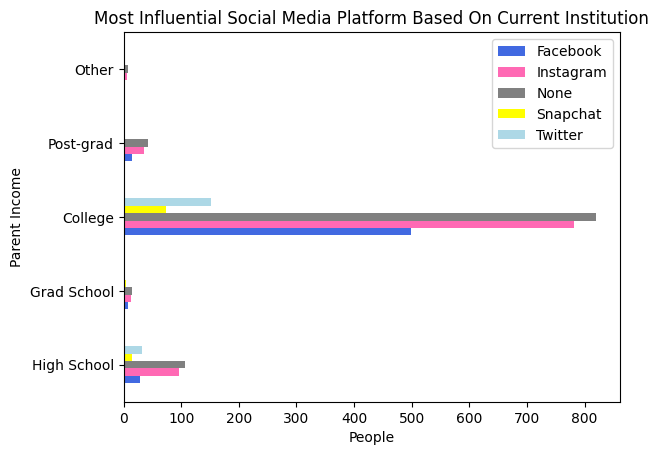

In [ ]:
institution.set_index(['Segment Description', 'Answer']).unstack(level='Answer').droplevel(None, axis=1).reindex(['High School',
                                                                                                                  'Grad School',
                                                                                                                  'College',
                                                                                                                  'Post-grad',
                                                                                                                  'Other']).plot.barh(color=['royalblue',
                                                                                                                                              'hotpink',
                                                                                                                                              'grey',
                                                                                                                                              'yellow',
                                                                                                                                              'lightblue']);
plt.title("Most Influential Social Media Platform Based On Current Institution");
plt.ylabel("Parent Income");
plt.xlabel("People");
plt.legend(loc='upper right');

# Insight & Recommendation

Insight:
1. Most respondents online shop behavior were mostly influenced by **Instagram**. One third of people choose "None"
2. **Female** mostly choose **Instagram**, while **Male** choose **Instagram and Facebook**. Male were less likely be influenced by social media (according to the number of male choosing "None").
3. Based on parent income and current institution (high school, university, other), the **trend** is always the same. Most respondents answered with **None, Instagram, and Facebook**.
4. Most respondent were a student of university.

Recommendation:
1. Having an instagram and facebook account to promote and sell the product.
2. Focus advertising on the product for women in the age around 20.


## Adidas US Sales Data (Second Dataset)
Data Description

This complete project was downloaded as raw data from Kaggle, I added some more sheets to it and make it perfect to understand by cleaning data, analyzing data and visualizing data in a perfect manner.

https://www.kaggle.com/datasets/sakhawatalilarik/adidas-us-sales-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filename3= '/content/drive/MyDrive/Algoritma_Project/Adidas US Sales Datasets.csv'
df_adidas2= pd.read_csv(filename3)

In [ ]:
df_adidas2.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60,900,"$540,000","$162,000",30%,In-store


In [ ]:
df_adidas2.shape

(9648, 13)

**Data Pre-processing**

In [ ]:
df_adidas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [ ]:
df_adidas2['Price per Unit'] = df_adidas2['Price per Unit'].str.replace('$', '')
df_adidas2['Total Sales'] = df_adidas2['Total Sales'].str.replace('$', '')
df_adidas2['Operating Profit'] = df_adidas2['Operating Profit'].str.replace('$', '')


<ipython-input-7-eed654640893>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_adidas2['Price per Unit'] = df_adidas2['Price per Unit'].str.replace('$', '')
<ipython-input-7-eed654640893>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_adidas2['Total Sales'] = df_adidas2['Total Sales'].str.replace('$', '')
<ipython-input-7-eed654640893>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_adidas2['Operating Profit'] = df_adidas2['Operating Profit'].str.replace('$', '')


In [ ]:
df_adidas2['Units Sold'] = df_adidas2['Units Sold'].str.replace(',', '')
df_adidas2['Total Sales'] = df_adidas2['Total Sales'].str.replace(',', '')
df_adidas2['Operating Profit'] = df_adidas2['Operating Profit'].str.replace(',', '')

In [ ]:
df_adidas2.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30%,In-store


In [ ]:
column_to_change= ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']
df_adidas2[column_to_change]=df_adidas2[column_to_change].astype('int64')

In [ ]:
print(df_adidas2['Retailer'].unique())
print(df_adidas2['Sales Method'].unique())
print(df_adidas2['Product'].unique())

['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
['In-store' 'Outlet' 'Online']
["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]


In [ ]:
column_to_change2=['Retailer', 'Sales Method', 'Product']
df_adidas2[column_to_change2]=df_adidas2[column_to_change2].astype('category')

In [ ]:
df_adidas2['Invoice Date'] = pd.to_datetime(df_adidas2['Invoice Date'], format='%m/%d/%Y')

In [ ]:
df_adidas2.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

**EXPLORATORY DATA ANALYSIS (EDA)**

# Business Question: Produk sepatu Apa yang paling diminati?

In [ ]:
df_adidas2.pivot_table(index= 'Product',
                       values='Units Sold',
                       aggfunc= 'sum').sort_values(by= 'Units Sold', ascending= False)

,Units Sold
Product,
Men's Street Footwear,593320
Men's Athletic Footwear,435526
Women's Apparel,433827
Women's Street Footwear,392269
Women's Athletic Footwear,317236
Men's Apparel,306683


<Axes: xlabel='Product'>

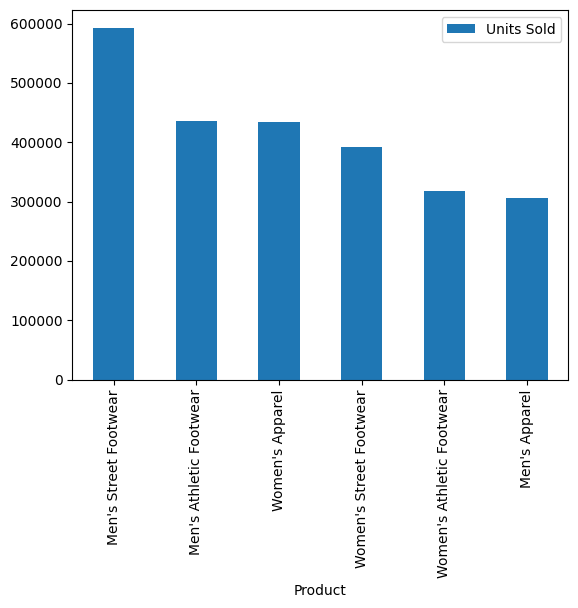

In [ ]:
#Identify product that the people commonly purchased/like
best_selling_product=df_adidas2.pivot_table(index= 'Product',
                       values='Units Sold',
                       aggfunc= 'sum').sort_values(by= 'Units Sold', ascending= False).plot.bar()
best_selling_product
#plt.savefig('/content/drive/MyDrive/Algoritma_Project/bar chart product.png')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df_adidas2['Total Sales'].sum()

899902125

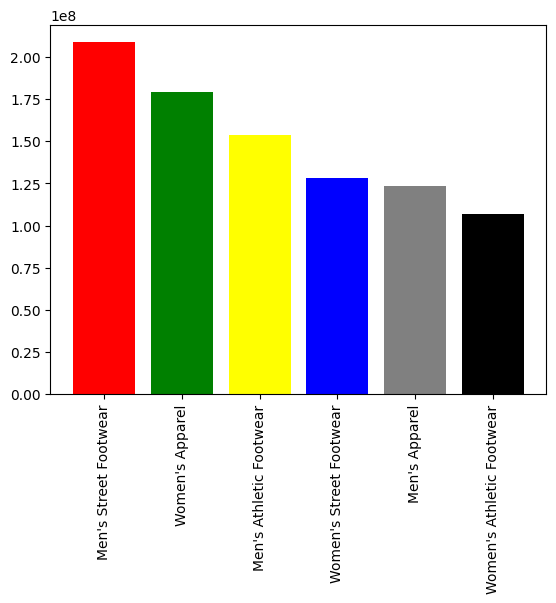

<Figure size 640x480 with 0 Axes>

In [ ]:
#Aggregation table to determine total sales for each product
total_revenue_by_product= df_adidas2.pivot_table(index= 'Product',
                                                 values='Total Sales',
                                                 aggfunc='sum').sort_values(by= 'Total Sales', ascending=False).reset_index()
#create bar plot
X= total_revenue_by_product['Product']
Y= total_revenue_by_product['Total Sales']
Colors= ['red', 'green', 'yellow', 'blue', 'grey', 'black']
plt.bar(X, Y, color= Colors)
plt.xticks(rotation=90)
plt.show()
plt.savefig('/content/drive/MyDrive/Algoritma_Project/bar chart revenue.png')

<Axes: xlabel='Retailer'>

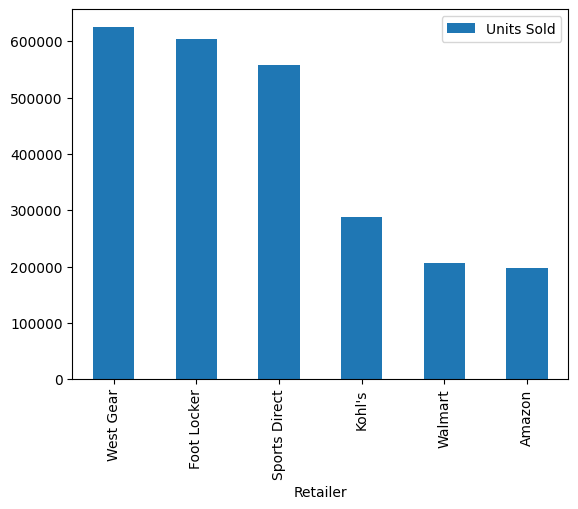

In [ ]:
#Identify highest number of retailers
df_adidas2.groupby('Retailer').agg({'Units Sold': 'sum'}).sort_values(by='Units Sold', ascending=False).plot.bar()


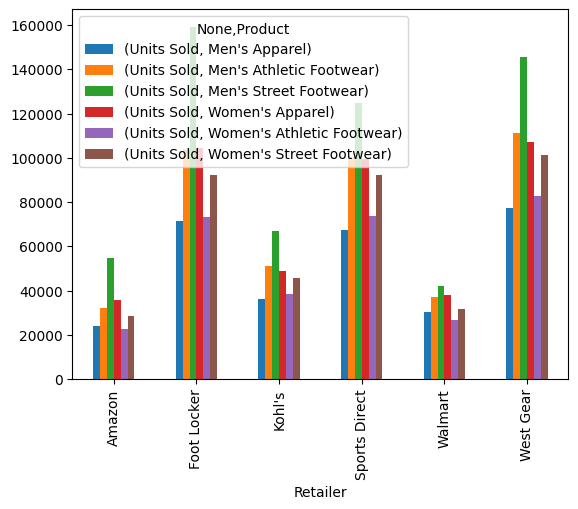

In [ ]:
#Identify hom many products are sold in each retailer
df_adidas2.groupby(['Retailer', 'Product']).agg({'Units Sold':'sum'}).unstack().plot.bar()
plt.savefig('/content/drive/MyDrive/Algoritma_Project/retalier2.png')

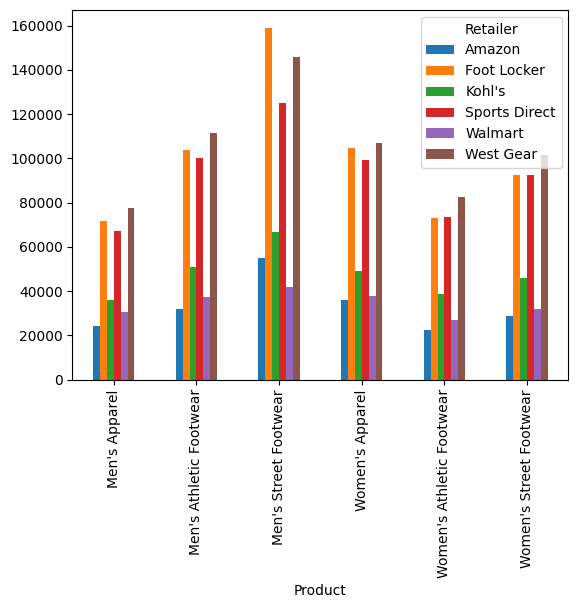

In [ ]:
#This is to identify highest number of product sold in each retailer
df_adidas2.pivot_table(index= 'Product',
                      columns='Retailer',
                      values='Units Sold',
                      aggfunc='sum').plot.bar()
plt.savefig('/content/drive/MyDrive/Algoritma_Project/product2.png')



In [ ]:
df_adidas3=df_adidas2.copy()

In [ ]:
#Extract month from invoice date
df_adidas3['Month']=df_adidas3['Invoice Date'].dt.month

In [ ]:
df_adidas3['Year']=df_adidas3['Invoice Date'].dt.year
df_adidas3.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50%,In-store,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30%,In-store,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35%,In-store,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35%,In-store,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30%,In-store,1,2020


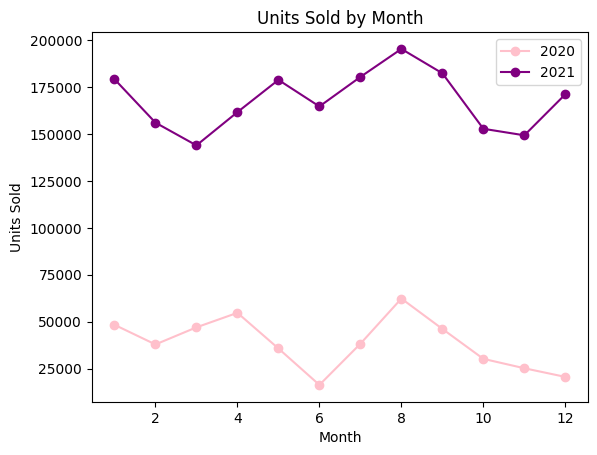

<Figure size 640x480 with 0 Axes>

In [ ]:
#Identify Sales Trend per month in 2020 and 2021 for looking up the pattern
line_chart=df_adidas3.pivot_table(index='Month',
                                  columns='Year',
                                  values='Units Sold',
                                  aggfunc='sum')
colors= ['pink', 'purple']
line_chart.plot(kind='line', marker='o', color=colors)
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Month')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Algoritma_Project/line1.png')

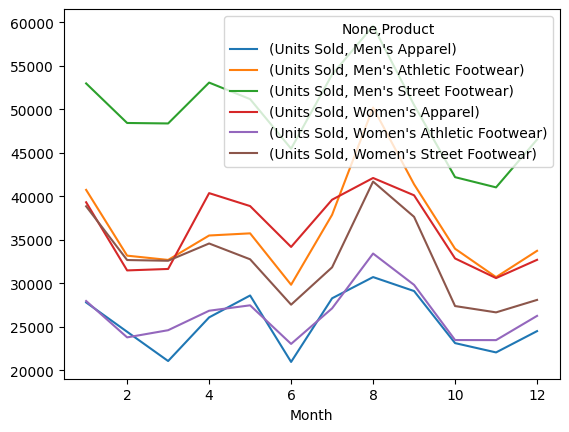

In [ ]:
#Identify product's trend sold in each month
df_adidas3.groupby(['Month', 'Product']).agg({'Units Sold':'sum'}).unstack().plot(kind='line');
plt.savefig('/content/drive/MyDrive/Algoritma_Project/line2.png')

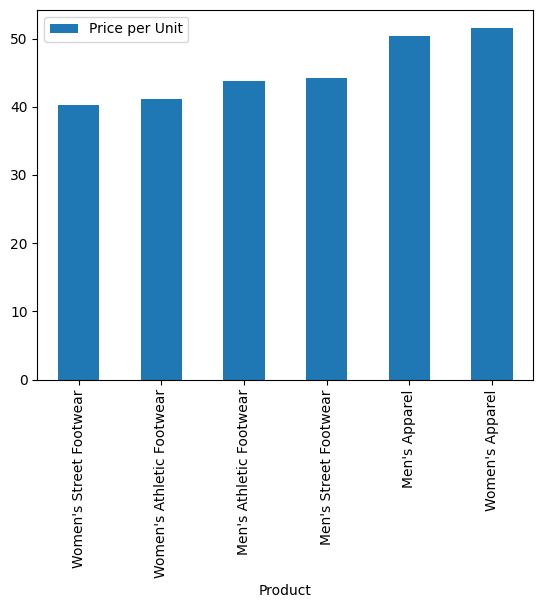

In [ ]:
#Identify avarage price per unit for each product
df_adidas3.pivot_table(index='Product',
                       values='Price per Unit',
                       aggfunc='mean').sort_values(by='Price per Unit', ascending=True).plot.bar()
plt.savefig('/content/drive/MyDrive/Algoritma_Project/bar.png')

# Insights & Recommendations

Insight:




1.   Men's Street Footwear is the top-selling and most popular product.
2. Foot Looker and West Gear emerge as the leading retailers, boasting the highest sales numbers for these products.
3. Foot Looker and West Gear excel in selling Men's Street Footwear, Women's Apparel, and Men's Athletic Footwear, which are the products with the highest sales figures.
4. The sales pattern throughout 2020 and 2021 exhibits a similar trend, with the peak in total product sales occurring in August and the lowest in June and March for 2020 and 2021 respectively.
5. Men's Street Footwear generates the highest total revenue compared to all other products. Conversely, Women's Street Footwear, despite being the fifth favorite product when compared to Men's Apparel, generates the lowest revenue. This discrepancy arises from the fact that the average unit price for Women's Street Footwear is lower than that of Men's Apparel.








Recommendations:


1. Ensure an Ample Supply of Men's Street Footwear:
Take measures to significantly augment the inventory of Men's Street Footwear, catering to the growing demand for this product.
2. Expand Product Availability at Foot Locker and West Gear:
Implement strategies to enhance the stock availability of various items, particularly Men's Street Footwear, Women's Apparel, and Men's Athletic Footwear, at both Foot Locker and West Gear stores.
3. Advocate Increased Promotional Initiatives for Specific Product Categories:
Recommend that both retailers, Foot Locker and West Gear, intensify their promotional efforts to generate greater awareness and sales for Men's Street Footwear, Women's Apparel, and Men's Athletic Footwear.
4. Proactively enhance stock levels across all product categories for the month of August.



# Business Question: Berapa kisaran harga yang "affordable" bagi penduduk?

In [ ]:
df_adidas2.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30%,In-store


In [ ]:
df_adidas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   category      
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   category      
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   category      
dtypes: category(3), datetime64[ns](1), int64(5), object(4)
memory usage: 782.7+ KB

<Axes: title={'center': 'Products price distribution'}, ylabel='Frequency'>

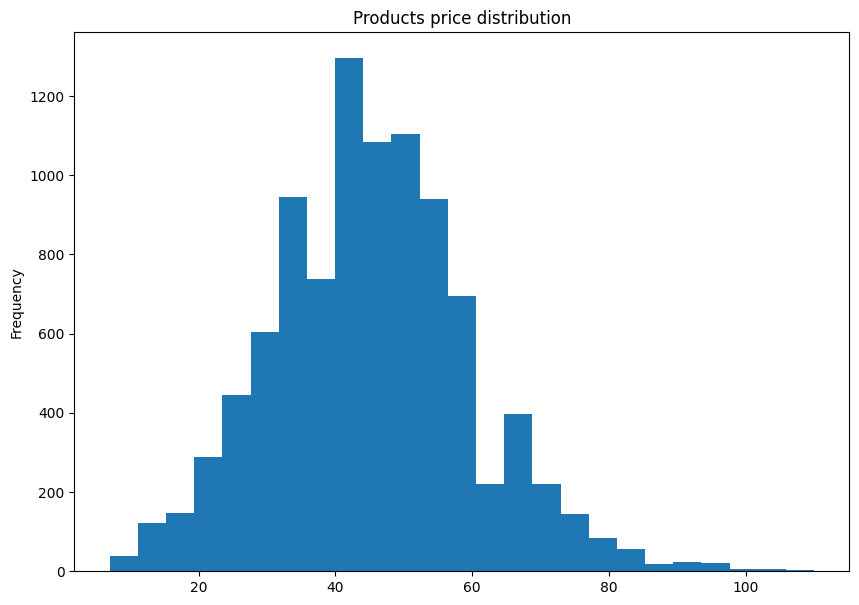

In [ ]:
df_adidas2['Price per Unit'].plot(kind='hist',bins=25,figsize=(10,7),title='Products price distribution')

In [ ]:
df_adidas2['Price per Unit'].mean()

45.21662520729685

In [ ]:
top_salesmt= df_adidas2[['Sales Method','Total Sales']].groupby('Sales Method').sum()

<Axes: title={'center': 'Top Selling Methods'}, ylabel='Sales Method'>

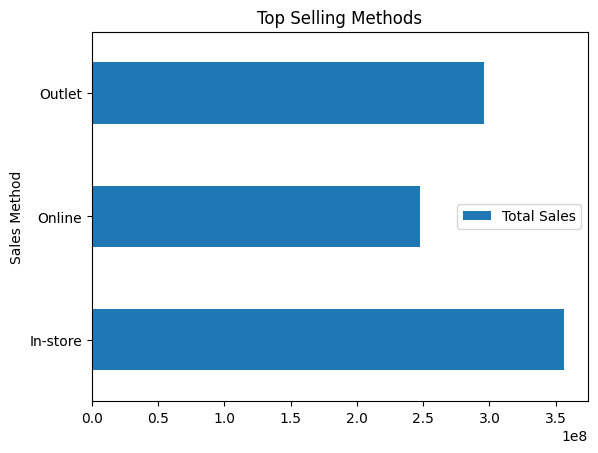

In [ ]:
top_salesmt.plot(kind='barh',title='Top Selling Methods')

In [ ]:
pivot_table_product = df_adidas2.pivot_table(
    index='Product',
    columns='Region',
    values='Price per Unit',
    aggfunc='mean'
)
pivot_table_product

Region,Midwest,Northeast,South,Southeast,West
Product,,,,,
Men's Apparel,47.144231,52.469697,42.798611,55.392157,53.458128
Men's Athletic Footwear,38.137821,44.941919,36.590278,48.779412,49.512195
Men's Street Footwear,41.810897,48.727273,35.263889,48.573529,45.890244
Women's Apparel,47.455128,52.388889,43.538194,57.264706,56.865196
Women's Athletic Footwear,34.544872,41.492424,36.635417,46.000000,46.509852
Women's Street Footwear,33.080128,40.128788,34.593750,45.088235,47.433824


In [ ]:
# Menghitung rata-rata harga per unit untuk setiap kota
average_prices = pivot_table_product.mean()
average_prices

Region
Midwest      40.362179
Northeast    46.691498
South        38.236690
Southeast    50.183007
West         49.944906
dtype: float64

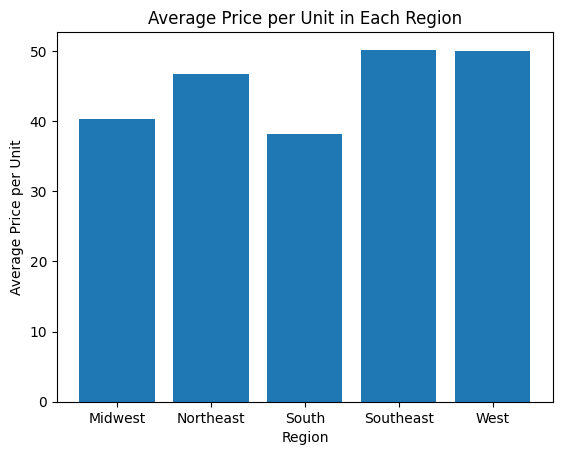

In [ ]:
from pandas.plotting import register_matplotlib_converters
# Menghitung rata-rata harga per unit untuk setiap kota
average_prices = pivot_table_product.mean()

# Membuat plot bar untuk rata-rata harga per unit
register_matplotlib_converters = average_prices.index
prices = average_prices.values

plt.bar(register_matplotlib_converters, prices)

# Menambahkan label dan judul
plt.xlabel('Region')
plt.ylabel('Average Price per Unit')
plt.title('Average Price per Unit in Each Region')

# Menampilkan plot
plt.show()

# Insights & Recommendations

Insight:

1. Price Range: The majority of products fall within the price range of `$`40 to `$`60, with an average product price of `$`45.22. This suggests that retailers should consider pricing their products within this range to align with market expectations.

2. Sales Channel: It is evident that retailers sell more products in-store compared to other sales channels. This could indicate that customers prefer the in-store shopping experience. Retailers should focus on maintaining and improving their physical retail presence to cater to customer preferences.

3. Regional Price Analysis:
* Midwest: The average price per unit in the Midwest region is `$`40.36.
Retailers operating in this region may want to maintain competitive pricing within this range to attract customers.

* Northeast: The average price per unit in the Northeast region is `$`46.69. Retailers in this region could consider positioning their products at a slightly higher price point, taking into account the higher average pricing in this market.

* South: The average price per unit in the South region is `$`38.23. Retailers operating in the South may want to focus on offering products at a relatively lower price point to cater to price-sensitive customers.

* Southeast: The average price per unit in the Southeast region is `$`50.18. Retailers in this region may consider offering products at a slightly higher price point, considering the market's willingness to spend more on average.

* West: The average price per unit in the West region is `$`49.94. Retailers in the West could position their products at a slightly higher price point, similar to the Northeast and Southeast regions.


Recommendations based on these insights:

1. Maintain competitive pricing: Retailers should consider pricing their products within the range of `$`40 to `$`60, which aligns with the majority of prices in the dataset.

2. Strengthen in-store presence: Since in-store sales are dominant, retailers should focus on enhancing the in-store shopping experience to attract more customers and drive sales.

3. Regional pricing strategies: Retailers should analyze the specific market dynamics in each region and adjust their pricing strategies accordingly. This may involve setting prices slightly higher or lower than the average depending on the region's average price per unit.

